# Part II - Prosper Loan Data Exploration
## by Radu Covlea

## Investigation Overview

> The primary goal of this analysis is to explore and explain the key patterns, trends, and insights derived from the Prosper Loan dataset. By focusing on the overarching question, "What factors influence the loan status and borrower APR in the Prosper Loan dataset?", this analysis aims to provide actionable insights and support decision-making processes in personal lending.

>> Key insights: 

> 1. The majority of loans are 'Current', followed by 'Completed' and 'Chargedoff'. This distribution highlights the general performance of loans.

> 2. 'Chargedoff' and 'Defaulted' loans tend to have higher APRs, suggesting that higher interest rates might be indicative of higher risk.

> 3. Loans with a 36-month term have a lower average APR compared to 60-month loans, suggesting that shorter loan terms are associated with lower risk and more favorable interest rates.



## Dataset Overview and Executive Summary

> The dataset under investigation is the Prosper Loan dataset, which includes information about loans issued through the Prosper marketplace. Prosper is a peer-to-peer lending platform where individuals can lend money to other individuals. The dataset contains various attributes of each loan, such as loan status, borrower APR, credit grade, loan term, and other borrower characteristics.

>> Executive Summary

> Loan Status Distribution: a significant proportion of loans in the dataset are either 'Current' or 'Completed', with a smaller percentage being 'Chargedoff' or 'Defaulted'. Understanding the distribution of loan statuses helps identify the overall health of the loan portfolio.

> Borrower APR Influences: the Borrower APR (Annual Percentage Rate) varies significantly based on the credit grade, loan term, and borrower characteristics. Higher credit grades are associated with lower APRs, indicating a lower risk for lenders.

> Impact of Loan Term: loans with a 36-month term tend to have lower APRs compared to those with a 60-month term. This suggests that shorter-term loans are perceived as less risky, leading to more favorable rates for borrowers.


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('prosperLoanData.csv')
sample_data = df.sample(n=1000, random_state=1)

## (Visualization 1)

> The majority of loans are 'Current', indicating that a large number of loans are still being repaid.
'Completed' loans form the second largest category, suggesting successful repayment.

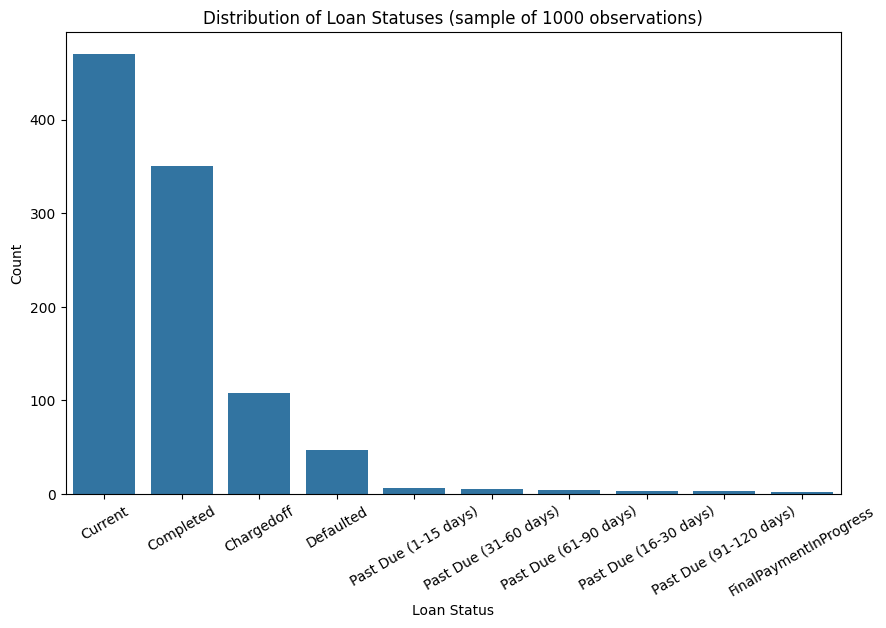

In [4]:
#making 'LoanStatus' variable categorical data type
loan_status = ['Current', 'Completed','Chargedoff','Defaulted','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (16-30 days)', 'Past Due (91-120 days)', 'FinalPaymentInProgress']
ordered_loan_status = pd.CategoricalDtype(ordered=True,categories=loan_status)
sample_data['LoanStatus'] = sample_data['LoanStatus'].astype(ordered_loan_status)

# create a bar chart showing the counts of different loan statuses
plt.figure(figsize=(10, 6))
sns.countplot(data=sample_data, x='LoanStatus', color = 'tab:blue')
plt.title('Distribution of Loan Statuses (sample of 1000 observations)')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()

## (Visualization 2)

> The median APR for 'Chargedoff' and 'Defaulted' loans is noticeably higher, indicating that loans with higher APRs are more likely to result in negative outcomes.

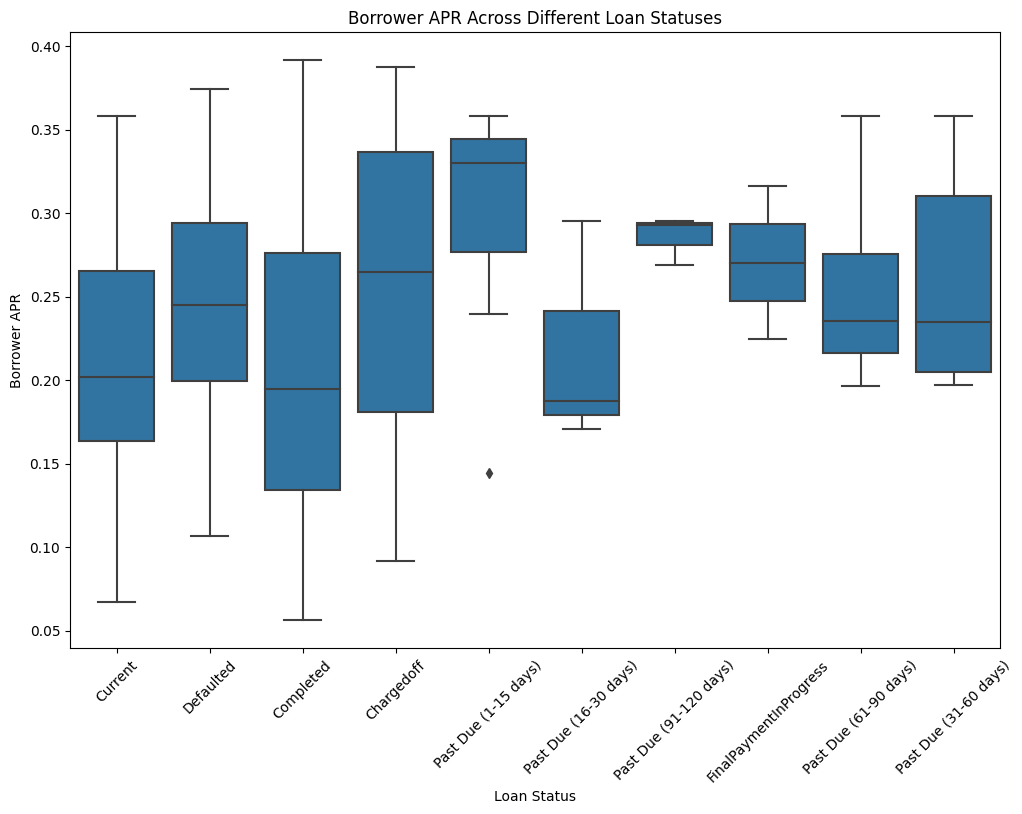

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=sample_data, x='LoanStatus', y='BorrowerAPR',color = 'tab:blue')
plt.title('Borrower APR Across Different Loan Statuses')
plt.xlabel('Loan Status')
plt.ylabel('Borrower APR')
plt.xticks(rotation=45)
plt.show()

## (Visualization 3)

> The difference in average APR suggests that longer-term loans are perceived as riskier by lenders, resulting in higher interest rates for borrowers.

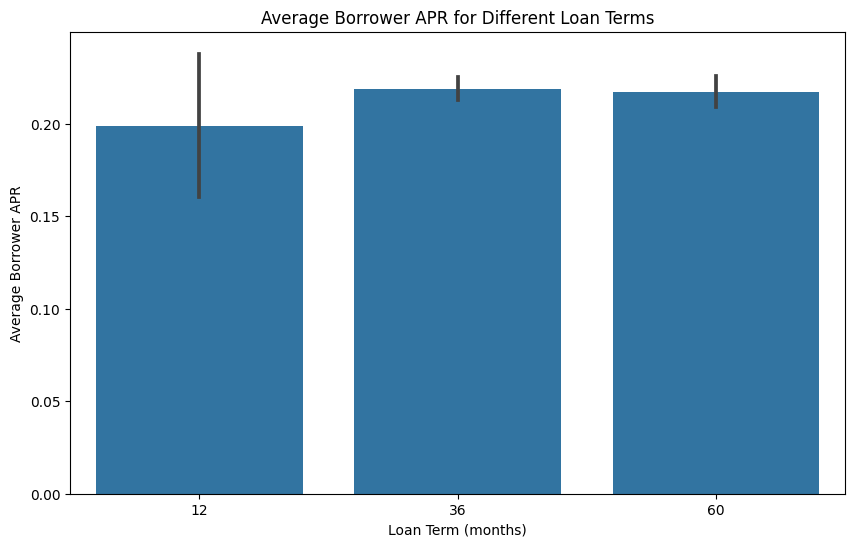

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=sample_data, x='Term', y='BorrowerAPR', color='tab:blue')
plt.title('Average Borrower APR for Different Loan Terms')
plt.xlabel('Loan Term (months)')
plt.ylabel('Average Borrower APR')
plt.show()